In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install xlrd
!pip install openpyxl

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no 

In [132]:
df = pd.read_excel('mushrooms.xlsx')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [130]:
colnames = df.columns[1:].tolist()
colnames

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

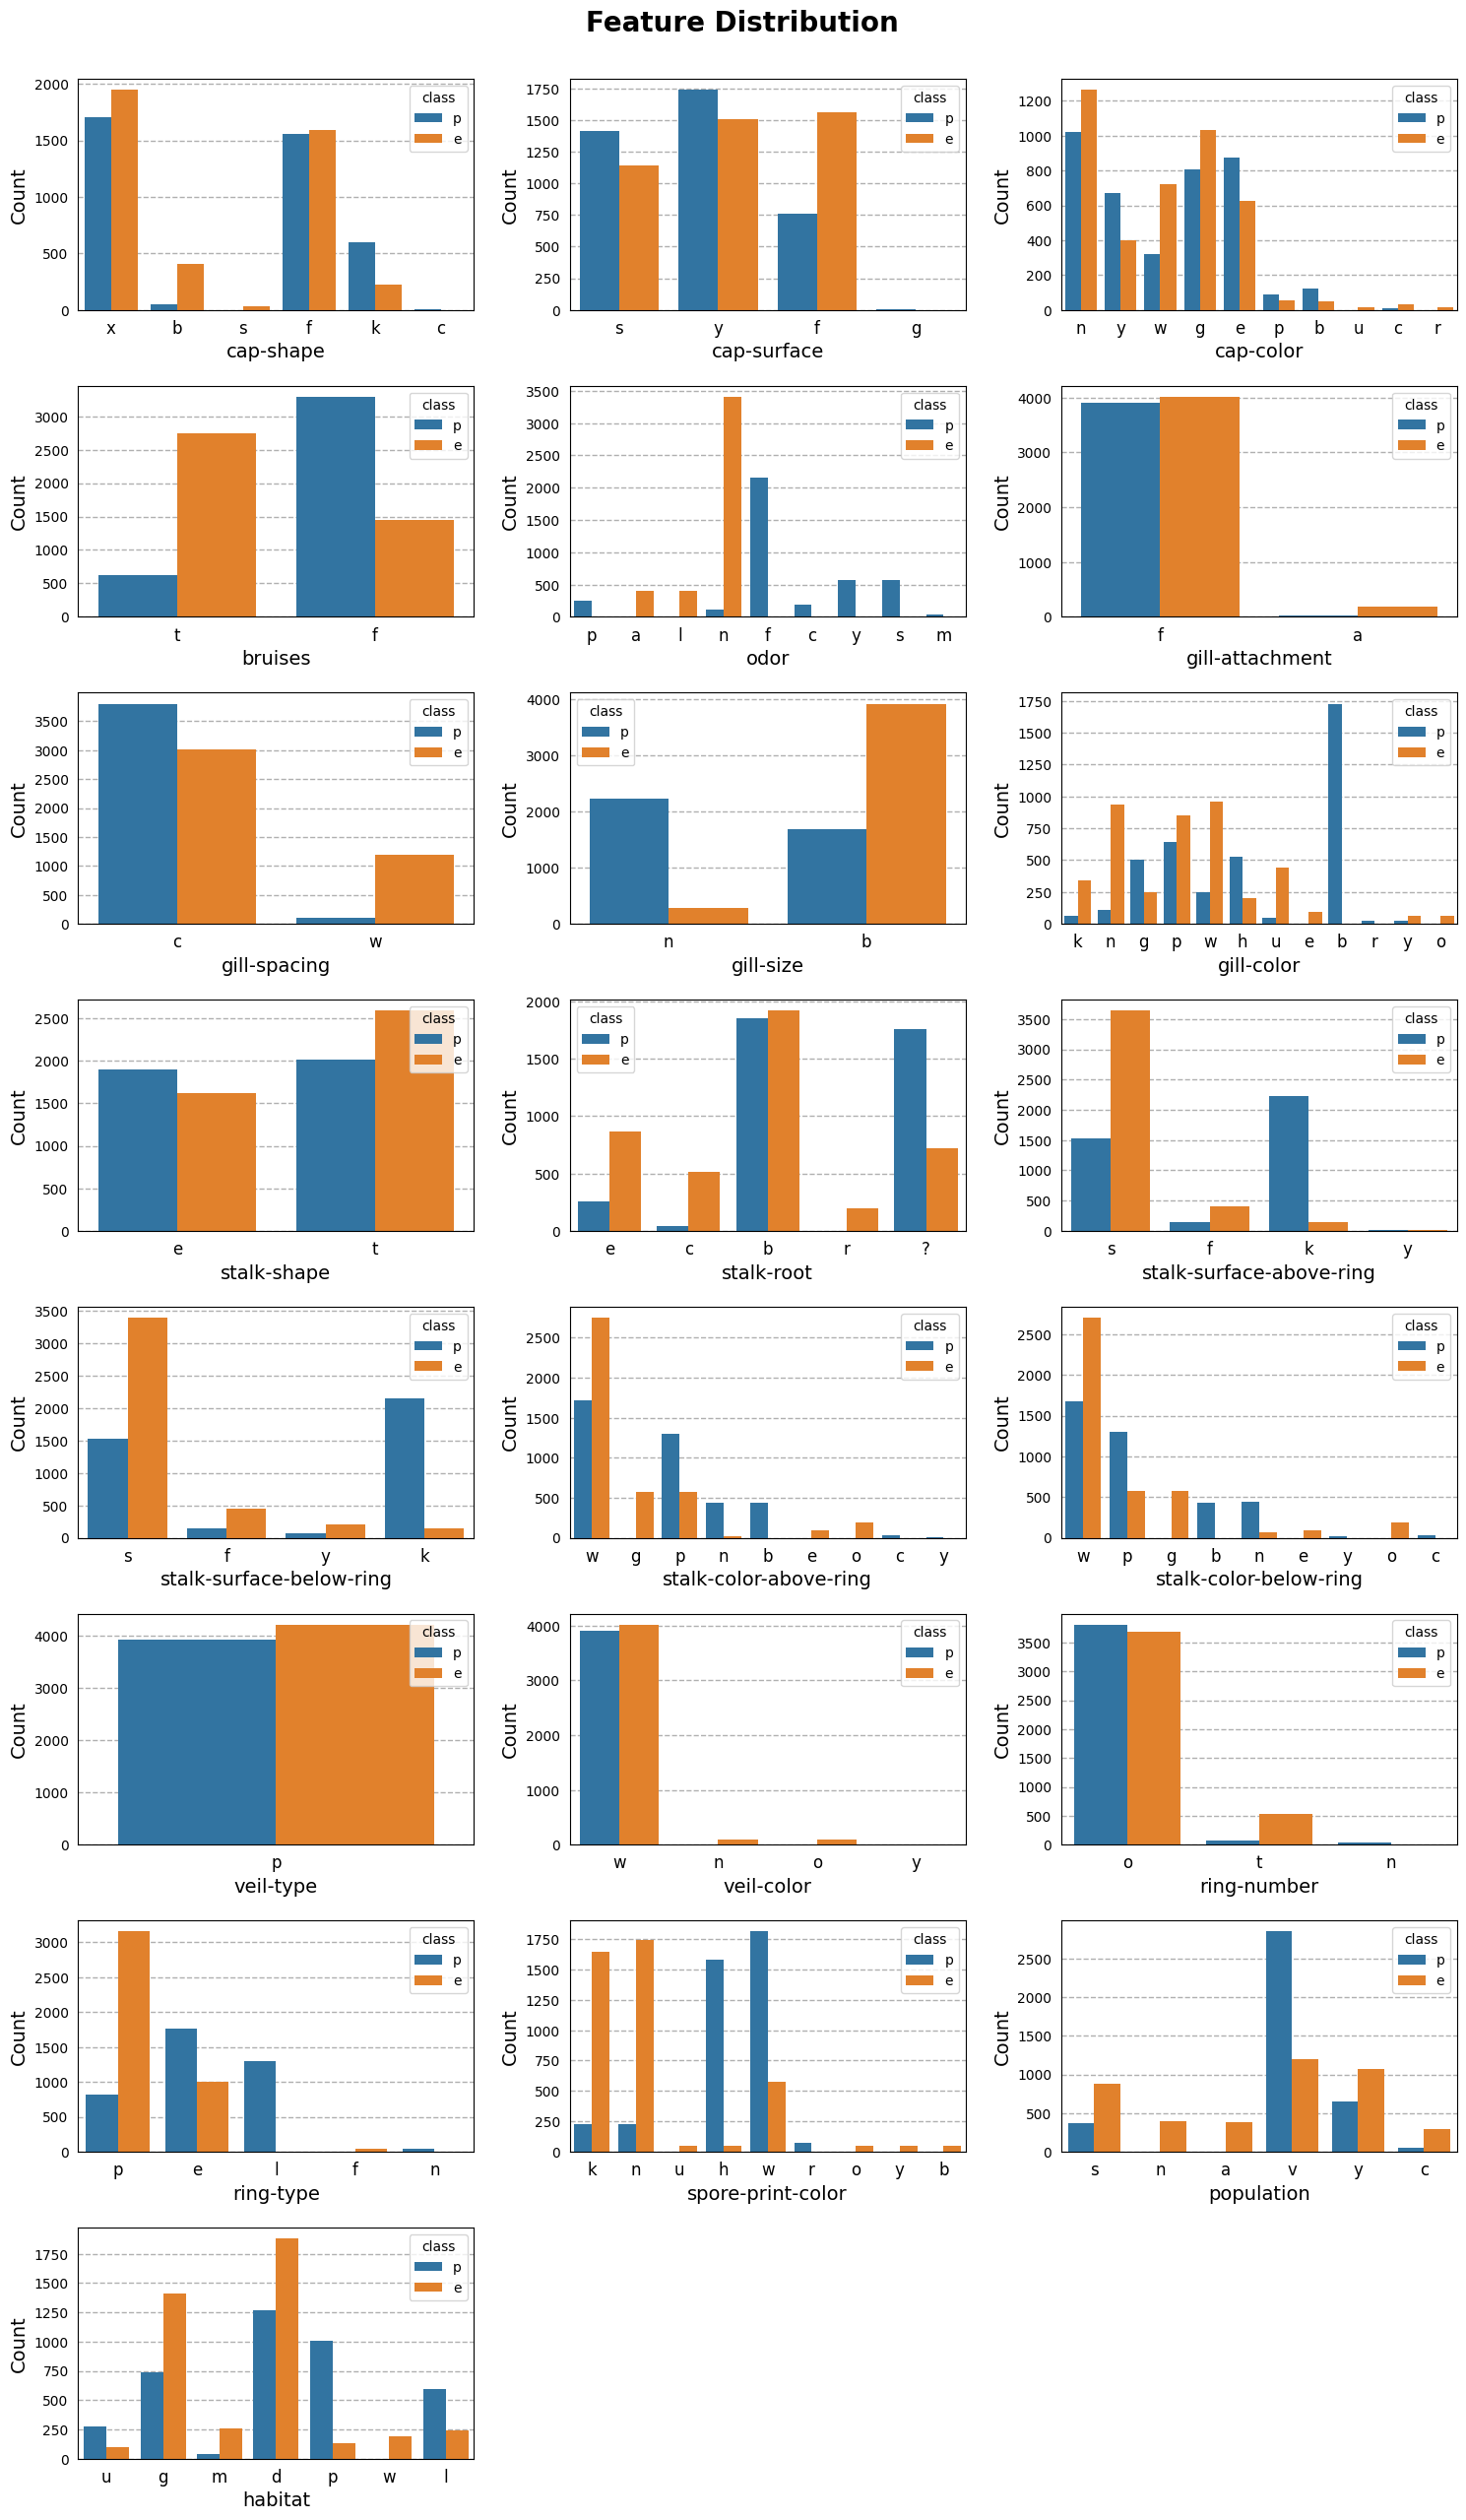

In [52]:
fig = plt.figure(figsize=(15, 25))
for idx, feature in enumerate(colnames):
    ax = fig.add_subplot(8, 3, idx+1)
    ax.grid(axis="y", linewidth=1,linestyle="--", zorder=0)
    sns.countplot(x=feature, data=df, hue = 'class',zorder=2)
    ax.xaxis.set_tick_params(size=0, labelsize=12, pad=7)
    ax.yaxis.set_tick_params(size=0, labelsize=10, pad=7)
    ax.set_ylabel("Count", fontsize=14)
    ax.set_xlabel(feature, fontsize=14)

fig.text(x=0.4, y=1., s="Feature Distribution\n", fontsize=20, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

In [57]:
selected = ["cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-color", "gill-spacing",
           "gill-size","gill-color", "stalk-root", "stalk-surface-above-ring","stalk-surface-below-ring", 
           "stalk-color-above-ring","stalk-color-below-ring","ring-number", "ring-type", 
           "spore-print-color", "population", "habitat", "class"]
selected_df = df[selected]
selected_df['class'].replace({'e': 0, 'p': 1}, inplace=True)
selected_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-color,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,k,c,n,k,e,s,s,w,w,o,p,k,s,u,1
1,x,s,y,t,a,k,c,b,k,c,s,s,w,w,o,p,n,n,g,0
2,b,s,w,t,l,n,c,b,n,c,s,s,w,w,o,p,n,n,m,0
3,x,y,w,t,p,n,c,n,n,e,s,s,w,w,o,p,k,s,u,1
4,x,s,g,f,n,k,w,b,k,e,s,s,w,w,o,e,n,a,g,0


In [85]:
from sklearn import metrics, tree
from sklearn.preprocessing  import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score

In [111]:
X = selected_df.drop(['class'], axis=1)
y = selected_df['class']

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [113]:
encoder = OrdinalEncoder()
encoder.fit(X_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

X_train

array([[5., 2., 0., ..., 1., 4., 5.],
       [5., 0., 3., ..., 2., 5., 0.],
       [5., 0., 3., ..., 1., 4., 0.],
       ...,
       [2., 3., 4., ..., 3., 5., 4.],
       [3., 2., 2., ..., 7., 4., 4.],
       [3., 0., 3., ..., 7., 2., 1.]])

In [114]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 1.0000


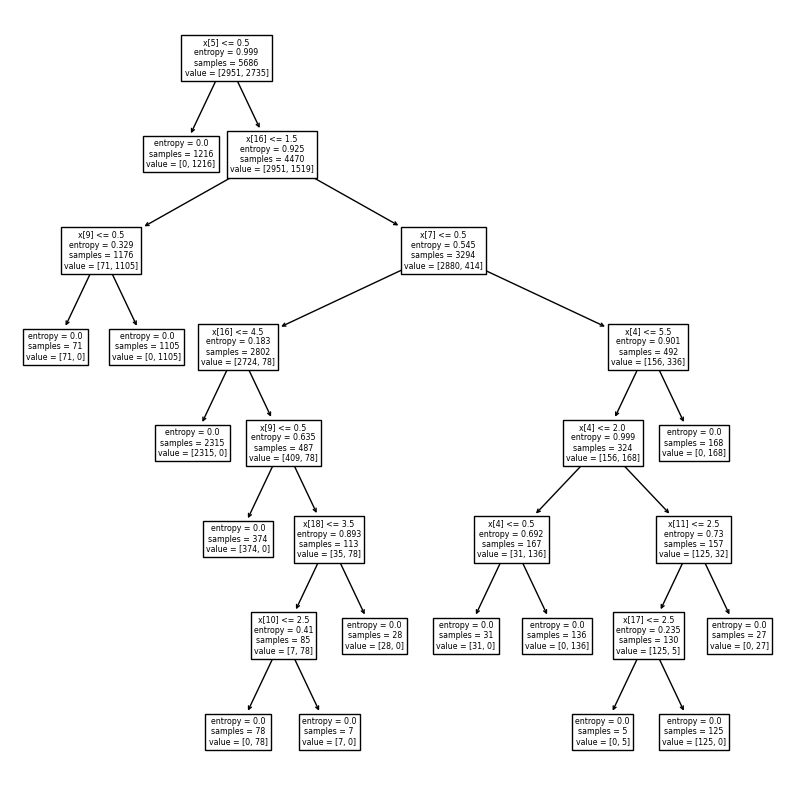

In [92]:
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(clf);

In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1257    0]
 [   0 1181]]


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### Feature Importance

In [122]:
importances = clf.feature_importances_

In [119]:
df_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
df_importances = df_importances.sort_values(by='importance', ascending=False)
df_importances

,feature,importance
16,spore-print-color,0.379292
5,gill-color,0.272339
7,gill-size,0.147792
9,stalk-root,0.104757
4,odor,0.057894
11,stalk-surface-below-ring,0.014781
18,habitat,0.011621
10,stalk-surface-above-ring,0.006142
17,population,0.005383
6,gill-spacing,0.000000


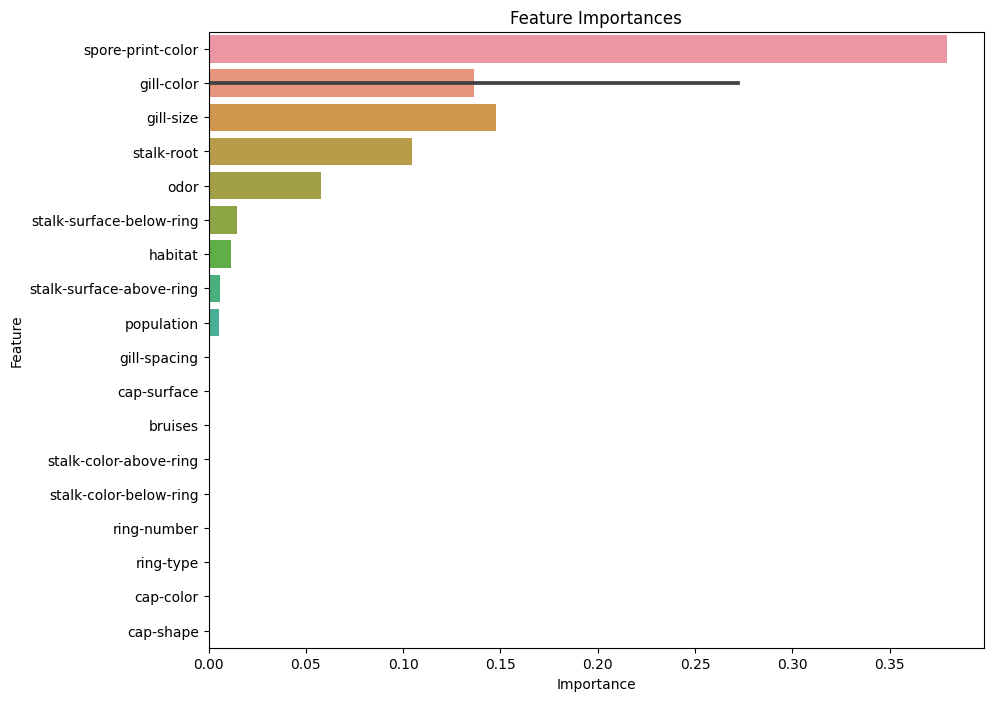

In [121]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=df_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

### k-fold

In [129]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

train_scores = []
test_scores = []

for train_set, test_set in kf.split(X):
    X_train, X_test = X.iloc[train_set], X.iloc[test_set]
    y_train, y_test = y[train_set], y[test_set]
    
    encoder = OrdinalEncoder()
    encoder.fit(X_train)

    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)
    
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

print(train_scores,test_scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
